In [2]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('insurance.csv')

In [8]:
data.shape

(1338, 7)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

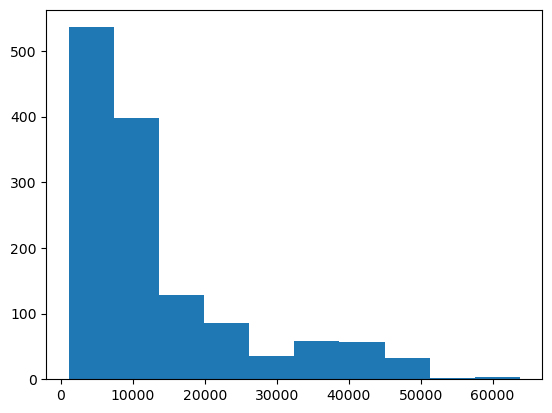

In [18]:
import matplotlib.pyplot as plt
plt.hist(data['charges'])

In [20]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
mean = np.mean(data['charges'])
mean

13270.422265141257

In [28]:
std = np.std(data['charges'])
std

12105.484975561605

In [30]:
(data['charges']-mean)/std

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64

In [32]:
data['charges_z_score'] = (data['charges']-mean)/std

In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges,charges_z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802


In [38]:
data[data['charges_z_score']>3]

,age,sex,bmi,children,smoker,region,charges,charges_z_score
34,28,male,36.400,1,yes,southwest,51194.55914,3.132806
543,54,female,47.410,0,yes,southeast,63770.42801,4.171663
577,31,female,38.095,1,yes,northeast,58571.07448,3.742159
819,33,female,35.530,0,yes,northwest,55135.40209,3.458348
1146,60,male,32.800,0,yes,southwest,52590.82939,3.248148
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861966
1300,45,male,30.360,0,yes,southeast,62592.87309,4.074389


In [42]:
data[data['charges_z_score']<-3]

,age,sex,bmi,children,smoker,region,charges,charges_z_score


In [52]:
data['charges_z_score'].min()

-1.0035573452584996

In [54]:
data['charges_z_score'].max()

4.1716631631700425

In [65]:
outlier_indexes = [] 
outlier_indexes.extend(data.index[data['charges_z_score']>3])

In [67]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [69]:
outlier_indexes.extend(data.index[data['charges_z_score']<-3])

In [71]:
outlier_indexes

[34, 543, 577, 819, 1146, 1230, 1300]

In [79]:
new_data = data.drop(data.index[outlier_indexes])

In [81]:
new_data

,age,sex,bmi,children,smoker,region,charges,charges_z_score
0,19,female,27.900,0,yes,southwest,16884.92400,0.298584
1,18,male,33.770,1,no,southeast,1725.55230,-0.953689
2,28,male,33.000,3,no,southeast,4449.46200,-0.728675
3,33,male,22.705,0,no,northwest,21984.47061,0.719843
4,32,male,28.880,0,no,northwest,3866.85520,-0.776802
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,-0.220551
1334,18,female,31.920,0,no,northeast,2205.98080,-0.914002
1335,18,female,36.850,0,no,southeast,1629.83350,-0.961596
1336,21,female,25.800,0,no,southwest,2007.94500,-0.930362


In [83]:
new_data.shape

(1331, 8)

(array([423., 338., 228.,  85.,  66.,  39.,  26.,  53.,  42.,  31.]),
 array([ 1121.8739 ,  5967.45275, 10813.0316 , 15658.61045, 20504.1893 ,
        25349.76815, 30195.347  , 35040.92585, 39886.5047 , 44732.08355,
        49577.6624 ]),
 <BarContainer object of 10 artists>)

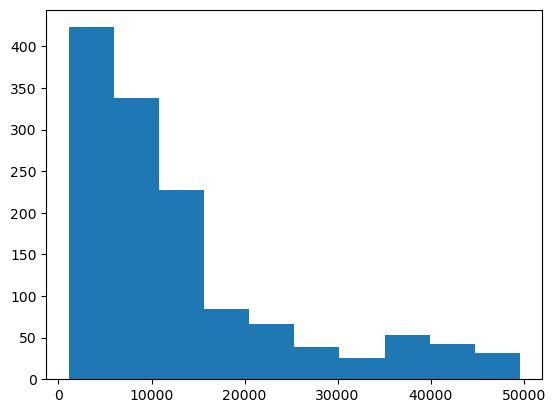

In [87]:
plt.hist(new_data['charges'])